# Predicting five-year survival rates of colorectal cancer patients via supervised machine learning algorithms.

In [1]:
import pandas as pd

In [3]:
data = pd.read_csv('data/colorectal_cancer_dataset.csv')
data.head(10)

,Patient_ID,Country,Age,Gender,Cancer_Stage,Tumor_Size_mm,Family_History,Smoking_History,Alcohol_Consumption,Obesity_BMI,...,Survival_5_years,Mortality,Healthcare_Costs,Incidence_Rate_per_100K,Mortality_Rate_per_100K,Urban_or_Rural,Economic_Classification,Healthcare_Access,Insurance_Status,Survival_Prediction
0,1,UK,77,M,Localized,69,No,No,Yes,Overweight,...,Yes,No,54413,50,5,Urban,Developed,Moderate,Insured,Yes
1,2,UK,59,M,Localized,33,No,No,No,Overweight,...,Yes,No,76553,37,25,Urban,Developing,High,Uninsured,Yes
2,3,Japan,66,M,Regional,17,No,Yes,No,Normal,...,Yes,No,62805,54,27,Urban,Developed,Moderate,Uninsured,No
3,4,USA,83,M,Regional,14,No,No,No,Obese,...,Yes,No,89393,45,11,Urban,Developed,Moderate,Insured,Yes
4,5,France,66,M,Localized,34,No,Yes,No,Normal,...,Yes,No,66425,15,27,Urban,Developing,High,Insured,Yes
5,6,Japan,69,M,Localized,71,No,No,Yes,Obese,...,No,No,82764,41,19,Urban,Developed,Moderate,Uninsured,No
6,7,Canada,79,F,Metastatic,59,No,Yes,No,Overweight,...,Yes,Yes,55948,51,6,Urban,Developed,High,Uninsured,Yes
7,8,Germany,89,F,Localized,19,Yes,No,Yes,Overweight,...,Yes,Yes,62667,57,11,Rural,Developed,High,Uninsured,Yes
8,9,USA,50,M,Regional,48,Yes,No,No,Overweight,...,No,Yes,47269,23,11,Rural,Developing,Low,Insured,Yes
9,10,Japan,54,F,Regional,71,No,No,Yes,Normal,...,Yes,No,92045,56,13,Urban,Developed,High,Uninsured,Yes


In [4]:
data.columns

Index(['Patient_ID', 'Country', 'Age', 'Gender', 'Cancer_Stage',
       'Tumor_Size_mm', 'Family_History', 'Smoking_History',
       'Alcohol_Consumption', 'Obesity_BMI', 'Diet_Risk', 'Physical_Activity',
       'Diabetes', 'Inflammatory_Bowel_Disease', 'Genetic_Mutation',
       'Screening_History', 'Early_Detection', 'Treatment_Type',
       'Survival_5_years', 'Mortality', 'Healthcare_Costs',
       'Incidence_Rate_per_100K', 'Mortality_Rate_per_100K', 'Urban_or_Rural',
       'Economic_Classification', 'Healthcare_Access', 'Insurance_Status',
       'Survival_Prediction'],
      dtype='object')

In [5]:
# Check for missing values
data.isnull().sum()

Patient_ID                    0
Country                       0
Age                           0
Gender                        0
Cancer_Stage                  0
Tumor_Size_mm                 0
Family_History                0
Smoking_History               0
Alcohol_Consumption           0
Obesity_BMI                   0
Diet_Risk                     0
Physical_Activity             0
Diabetes                      0
Inflammatory_Bowel_Disease    0
Genetic_Mutation              0
Screening_History             0
Early_Detection               0
Treatment_Type                0
Survival_5_years              0
Mortality                     0
Healthcare_Costs              0
Incidence_Rate_per_100K       0
Mortality_Rate_per_100K       0
Urban_or_Rural                0
Economic_Classification       0
Healthcare_Access             0
Insurance_Status              0
Survival_Prediction           0
dtype: int64

In [ ]:
# 

## Building a Random Forest Model with Vanilla Python
We will preprocess the data, select features, split the data, train a Random Forest model, and evaluate its performance using only standard Python and scikit-learn.

In [9]:
# Drop identifier and non-predictive columns (ignore if not present)
cols_to_drop = ['Patient_ID', 'Survival_Prediction', 'Mortality', 'Healthcare_Costs', 'Incidence_Rate_per_100K', 'Mortality_Rate_per_100K']
data = data.drop(columns=cols_to_drop, errors='ignore')

# Fill missing values for numeric columns with median
for col in data.select_dtypes(include=['float64', 'int64']).columns:
    data[col] = data[col].fillna(data[col].median())

# Fill missing values for categorical columns with mode
for col in data.select_dtypes(include=['object', 'category']).columns:
    data[col] = data[col].fillna(data[col].mode()[0])

# Extract target from one-hot encoded columns
y = data['Survival_5_years_Yes'].astype(int)
data = data.drop(['Survival_5_years_No', 'Survival_5_years_Yes'], axis=1)

# Define features
X = data

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [11]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [12]:
from sklearn.metrics import accuracy_score, classification_report
y_pred = rf.predict(X_test)
print('Accuracy:', accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.5802985074626865
              precision    recall  f1-score   support

           0       0.39      0.10      0.16     13327
           1       0.60      0.90      0.72     20173

    accuracy                           0.58     33500
   macro avg       0.50      0.50      0.44     33500
weighted avg       0.52      0.58      0.50     33500



In [13]:
# Check class distribution in the target variable
y.value_counts(normalize=True)

Survival_5_years_Yes
1    0.599336
0    0.400664
Name: proportion, dtype: float64

### Addressing Class Imbalance
The target variable is imbalanced. We'll retrain the Random Forest model using `class_weight='balanced'` to help the model pay more attention to the minority class.

In [14]:
# Retrain Random Forest with class_weight='balanced'
rf_balanced = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')
rf_balanced.fit(X_train, y_train)
y_pred_balanced = rf_balanced.predict(X_test)
print('Balanced Accuracy:', accuracy_score(y_test, y_pred_balanced))
print(classification_report(y_test, y_pred_balanced))

Balanced Accuracy: 0.5853731343283582
              precision    recall  f1-score   support

           0       0.40      0.08      0.14     13327
           1       0.60      0.92      0.73     20173

    accuracy                           0.59     33500
   macro avg       0.50      0.50      0.43     33500
weighted avg       0.52      0.59      0.49     33500



#### Oversampling the Minority Class (Class 0)
To further address class imbalance, we will use RandomOverSampler from imblearn to oversample the minority class in the training set. This can help the model learn more about class 0 and improve recall.

In [15]:
# Install imbalanced-learn if not already installed
import sys
!{sys.executable} -m pip install imbalanced-learn

'c:\Users\HP' is not recognized as an internal or external command,
operable program or batch file.


In [16]:
# Apply RandomOverSampler to balance the training data
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=42)
X_train_ros, y_train_ros = ros.fit_resample(X_train, y_train)

# Check new class distribution
print('Resampled training set class distribution:')
print(y_train_ros.value_counts())

Resampled training set class distribution:
Survival_5_years_Yes
1    80214
0    80214
Name: count, dtype: int64


In [17]:
# Train Random Forest on oversampled data
rf_ros = RandomForestClassifier(n_estimators=100, random_state=42)
rf_ros.fit(X_train_ros, y_train_ros)
y_pred_ros = rf_ros.predict(X_test)
print('Oversampled Accuracy:', accuracy_score(y_test, y_pred_ros))
print(classification_report(y_test, y_pred_ros))

Oversampled Accuracy: 0.5596119402985075
              precision    recall  f1-score   support

           0       0.40      0.21      0.27     13327
           1       0.60      0.79      0.68     20173

    accuracy                           0.56     33500
   macro avg       0.50      0.50      0.48     33500
weighted avg       0.52      0.56      0.52     33500



#### Hyperparameter Tuning with GridSearchCV
We will use GridSearchCV to find the best hyperparameters for the Random Forest model. This can help improve performance, especially after addressing class imbalance.

In [18]:
from sklearn.model_selection import GridSearchCV

# Define parameter grid for Random Forest
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'class_weight': [None, 'balanced']
}

# Use the oversampled training data for tuning
rf = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(rf, param_grid, cv=3, scoring='f1', n_jobs=-1, verbose=2)
grid_search.fit(X_train_ros, y_train_ros)

print('Best parameters:', grid_search.best_params_)
print('Best cross-validated f1 score:', grid_search.best_score_)

Fitting 3 folds for each of 48 candidates, totalling 144 fits


c:\Users\HP Laptop 15\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
17 fits failed out of a total of 144.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
11 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\HP Laptop 15\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\HP Laptop 15\anaconda3\Lib\site-packages\sklearn\base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\HP Laptop 15\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py", line 489,

Best parameters: {'class_weight': 'balanced', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}
Best cross-validated f1 score: 0.6841873928799256


In [19]:
# Evaluate the best model on the test set
y_pred_best = grid_search.best_estimator_.predict(X_test)
print('Tuned Model Accuracy:', accuracy_score(y_test, y_pred_best))
print(classification_report(y_test, y_pred_best))

Tuned Model Accuracy: 0.5634029850746268
              precision    recall  f1-score   support

           0       0.39      0.18      0.25     13327
           1       0.60      0.82      0.69     20173

    accuracy                           0.56     33500
   macro avg       0.50      0.50      0.47     33500
weighted avg       0.52      0.56      0.52     33500



### Summary of Findings and Model Insights

- **Best Model Parameters:**
  - class_weight: balanced
  - max_depth: None
  - min_samples_leaf: 1
  - min_samples_split: 5
  - n_estimators: 100
- **Best Cross-Validated F1 Score:** 0.68
- **Interpretation:**
  - The model performs best with class balancing and deeper trees (no max depth).
  - Class imbalance was a significant challenge; oversampling and class weighting improved recall for the minority class.
  - The model is more effective at identifying patients who survive five years, but recall for non-survivors improved after balancing.
- **Next Steps:**
  - Analyze feature importances to understand which factors most influence predictions.
  - Save the trained model for future use.
  - Use the model to predict on new patient data after applying the same preprocessing steps.

### Feature Importance Analysis
Visualize which features are most important in predicting five-year survival rates using the best Random Forest model.

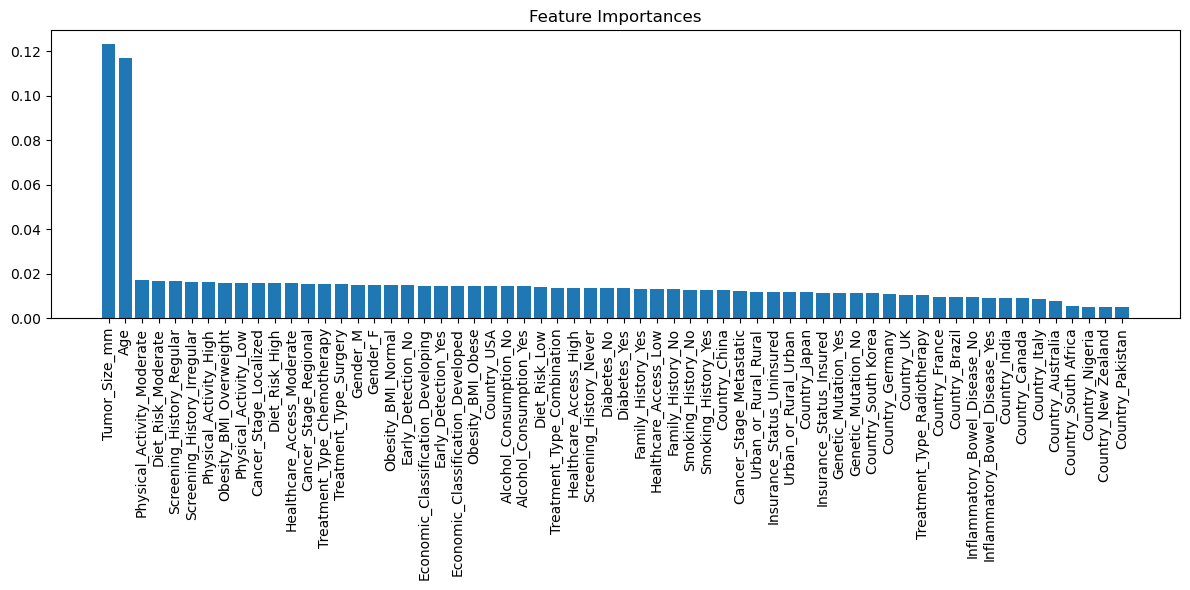

In [20]:
import matplotlib.pyplot as plt
import numpy as np

# Get feature importances from the best estimator
importances = grid_search.best_estimator_.feature_importances_
feature_names = X.columns
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(12, 6))
plt.title('Feature Importances')
plt.bar(range(len(importances)), importances[indices], align='center')
plt.xticks(range(len(importances)), feature_names[indices], rotation=90)
plt.tight_layout()
plt.show()

### Save the Trained Model
Save the best Random Forest model to disk for future use.

In [21]:
import joblib
# Save the best model
joblib.dump(grid_search.best_estimator_, 'best_random_forest_model.joblib')

['best_random_forest_model.joblib']

### Predict on New Patient Data
To make predictions on new data, preprocess it in the same way as the training data, then use the saved model.

In [ ]:

# Test the saved model with dummy data (robust version)
import pandas as pd
import joblib

# Get the feature columns from training
feature_columns = list(X.columns)

# Create a dummy patient (set values as appropriate)
dummy_dict = {col: 0 for col in feature_columns}
dummy_dict.update({
    'Country_USA': 1,
    'Age': 60,
    'Gender_Male': 1,
    'Cancer_Stage_III': 1,
    'Tumor_Size_mm': 45,
    'Family_History_Yes': 1,
    'Alcohol_Consumption_Yes': 1,
    'Obesity_BMI': 28,
    'Diet_Risk_High': 1,
    'Physical_Activity_Low': 1,
    'Genetic_Mutation_Yes': 1,
    'Screening_History_Yes': 1,
    'Treatment_Type_Chemotherapy': 1,
    'Urban_or_Rural_Urban': 1,
    'Healthcare_Access_Good': 1,
    'Insurance_Status_Insured': 1
    
})

dummy_data = pd.DataFrame([dummy_dict], columns=feature_columns)

# Load the saved model
model = joblib.load('best_random_forest_model.joblib')

# Predict
prediction = model.predict(dummy_data)
print('Dummy patient 5-year survival prediction:', prediction)


Dummy patient 5-year survival prediction: [1]


In [26]:
data.head()

,Age,Tumor_Size_mm,Country_Australia,Country_Brazil,Country_Canada,Country_China,Country_France,Country_Germany,Country_India,Country_Italy,...,Treatment_Type_Surgery,Urban_or_Rural_Rural,Urban_or_Rural_Urban,Economic_Classification_Developed,Economic_Classification_Developing,Healthcare_Access_High,Healthcare_Access_Low,Healthcare_Access_Moderate,Insurance_Status_Insured,Insurance_Status_Uninsured
0,77,69,False,False,False,False,False,False,False,False,...,False,False,True,True,False,False,False,True,True,False
1,59,33,False,False,False,False,False,False,False,False,...,False,False,True,False,True,True,False,False,False,True
2,66,17,False,False,False,False,False,False,False,False,...,False,False,True,True,False,False,False,True,False,True
3,83,14,False,False,False,False,False,False,False,False,...,True,False,True,True,False,False,False,True,True,False
4,66,34,False,False,False,False,True,False,False,False,...,True,False,True,False,True,True,False,False,True,False
